<a href="https://colab.research.google.com/github/YeonJaeHong/ESAA_homeworks/blob/main/YB_4%EC%A1%B0_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[영화 관객수 예측 경진대회 - DACON](https://dacon.io/competitions/open/235536/overview/description)


# 준비

In [2]:
# 한글 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# 한글깨짐 방지(2) - 런타임 재시작 유도 코드 (session crashed 메세지창 무시)
import os
os.kill(os.getpid(), 9)

In [1]:
# 필요한 라이브러리 & 기본 세팅
import numpy as np
import pandas as pd
# 소수점 아래 한자리 수까지 표시
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 로드
## read_csv 할 때부터 datetime object로 읽어들이기
train = pd.read_csv('/content/movies_train.csv', sep = ',', parse_dates = ['release_time'])
test = pd.read_csv('/content/movies_test.csv', sep = ',', parse_dates = ['release_time'])

# EDA

Dataset 내용
+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [3]:
print(train.shape)
print(test.shape)

(600, 12)
(243, 11)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


In [5]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.00,270.00,600.00,600.00,600.00,600.00
mean,100.86,1050442.89,0.88,151.12,3.71,708181.75
std,18.10,1791408.30,1.18,165.65,2.45,1828005.85
min,45.00,1.00,0.00,0.00,0.00,1.00
25%,89.00,20380.00,0.00,17.00,2.00,1297.25
50%,100.00,478423.62,0.00,82.50,3.00,12591.00
75%,114.00,1286568.62,2.00,264.00,4.00,479886.75
max,180.00,17615314.00,5.00,869.00,25.00,14262766.00


In [6]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.00,107.00,243.00,243.00,243.00
mean,109.80,891669.52,0.85,159.32,3.48
std,124.02,1217341.45,1.20,162.98,2.11
min,40.00,34.00,0.00,0.00,0.00
25%,91.00,62502.00,0.00,18.00,2.00
50%,104.00,493120.00,0.00,105.00,3.00
75%,114.50,1080849.58,1.00,282.00,4.00
max,2015.00,6173099.50,6.00,776.00,16.00


# 결측치 확인 및 데이터 전처리


In [7]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [8]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
test[test['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0
0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

## 1. 작가의 전작 관객수에 따른 평균 관객수

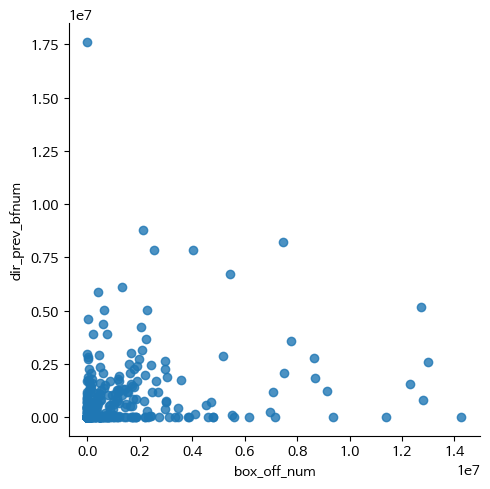

In [ ]:
scatter = sns.lmplot(x='box_off_num', y='dir_prev_bfnum', data=train, fit_reg=False)

x축을 관객 수, y축을 작가의 전작 관객 수로 설정한 scatter plot을 그렸다. 관객 수와 전작 관객 수는 상관성이 없는 것을 확인할 수 있다.

## 2. 작가의 전작 수와 해당 작품 관객 수

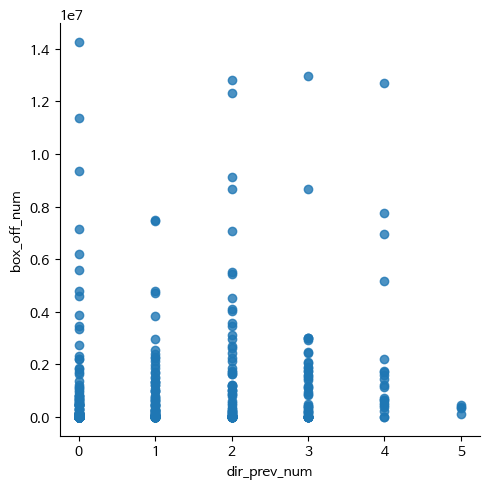

In [ ]:
scatter = sns.lmplot(y='box_off_num', x='dir_prev_num', data=train, fit_reg=False)

## 3. 감독에 따른 평균 스태프 수

In [9]:
train1 = train.groupby('director')['num_staff'].mean().sort_values(ascending=False)[:10]
train1

director
윤제균   869.00
이석훈   694.00
김한민   687.00
나홍진   683.00
이재규   650.00
안상훈   642.00
최호    600.00
김지운   582.00
강형철   577.50
김대승   574.00
Name: num_staff, dtype: float64

<Axes: xlabel='director'>

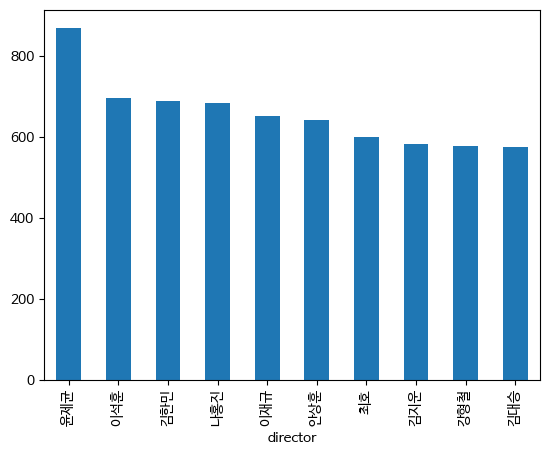

In [10]:
train1 = train.groupby('director')['num_staff'].mean().sort_values(ascending=False)[:10]
train1.plot(kind='bar')

x축에 감독님, y축에 평균 관객 수를 나타내어 bar plot 으로 나타내었고, 자료가 많은 관계로, 평균 스태프가 가장 많은 10명만 sorting 하여 나타냈었음

## 상위 10명의 감독들의 전작 수와 영화 관객 수

In [11]:
director1 = train.groupby(['director']).mean()
top10_directors1 = train.groupby(['director']).mean().sort_values(by=['box_off_num'], ascending = False)[:10]
top10_directors1.reset_index(inplace=True)
top10_directors1

<ipython-input-11-ceda675019e2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  director1 = train.groupby(['director']).mean()
<ipython-input-11-ceda675019e2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_directors1 = train.groupby(['director']).mean().sort_values(by=['box_off_num'], ascending = False)[:10]


,director,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,윤제균,126.00,NaN,0.00,869.00,4.00,14262766.00
1,최동훈,137.00,3867085.33,3.50,545.00,6.50,12845252.00
2,양우석,127.00,NaN,0.00,311.00,5.00,11374879.00
3,봉준호,125.00,NaN,0.00,67.00,10.00,9350351.00
4,한재림,139.00,1242778.00,2.00,298.00,6.00,9135806.00
5,황동혁,124.00,2781990.50,2.00,437.00,5.00,8659725.00
6,이석훈,127.00,2696683.83,3.50,694.00,2.00,8212959.50
7,김한민,122.00,2079989.00,1.00,687.00,4.00,7482180.00
8,추창민,124.50,1552541.00,2.00,353.00,3.50,6986501.00
9,장철수,123.00,220775.25,4.00,343.00,4.00,6959083.00


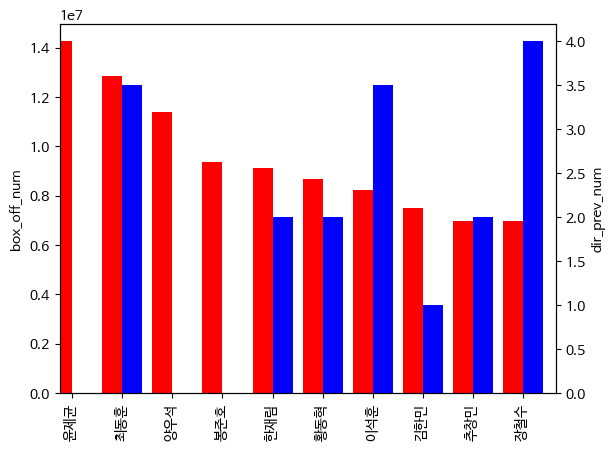

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4
top10_directors1.box_off_num.plot(kind='bar', color='red', ax=ax, width=width, position=1)
top10_directors1.dir_prev_num.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax2.set_ylabel('dir_prev_num')
ax.set_ylabel('box_off_num')

# 새로운 x 축 내용 추가
x = range(len(top10_directors1))  # x 축의 위치
new_labels = ['윤제균', '최동훈', '양우석','봉준호','한재림','황동혁','이석훈','김한민','추창민','장철수']
ax.set_xticks(x)  # x 축의 위치 설정
ax.set_xticklabels(new_labels)  # x 축 레이블 설정

plt.show()

In [13]:
director = train.groupby(['director']).sum()
top10_directors = train.groupby(['director']).sum().sort_values(by=['box_off_num'], ascending = False)[:10]
top10_directors.reset_index(inplace=True)
top10_directors

<ipython-input-13-f32bc0e32786>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  director = train.groupby(['director']).sum()
<ipython-input-13-f32bc0e32786>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_directors = train.groupby(['director']).sum().sort_values(by=['box_off_num'], ascending = False)[:10]


,director,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,최동훈,274,7734170.67,7,1090,13,25690504
1,이석훈,254,5393367.67,7,1388,4,16425919
2,윤제균,126,0.00,0,869,4,14262766
3,추창민,249,3105082.00,4,706,7,13973002
4,이환경,260,1638099.00,4,392,12,13347092
5,우민호,539,5305814.50,6,1431,16,11480550
6,강형철,271,16061870.50,3,1155,15,11469079
7,양우석,127,0.00,0,311,5,11374879
8,류승완,239,0.00,0,834,9,9889560
9,봉준호,125,0.00,0,67,10,9350351


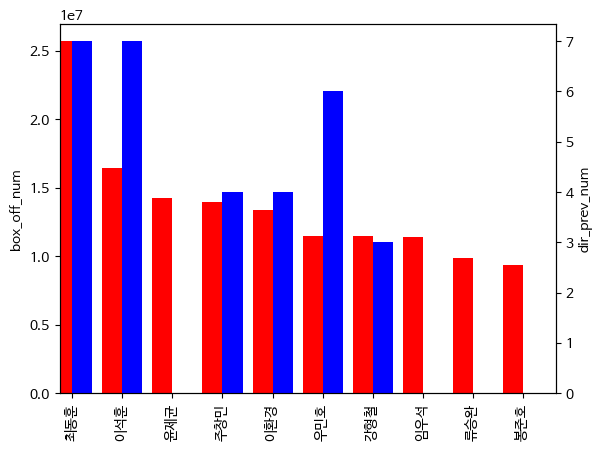

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4
top10_directors.box_off_num.plot(kind='bar', color='red', ax=ax, width=width, position=1)
top10_directors.dir_prev_num.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax2.set_ylabel('dir_prev_num')
ax.set_ylabel('box_off_num')

# 새로운 x 축 내용 추가
x = range(len(top10_directors))  # x 축의 위치
new_labels = ['최동훈','이석훈','윤제균','주창민','이환경','우민호','강형철','임우석','류승완','봉준호']
ax.set_xticks(x)  # x 축의 위치 설정
ax.set_xticklabels(new_labels)  # x 축 레이블 설정

plt.show()

빨간색 막대 그래프는 관객 수, 파란색 막대 그래프는 해당 감독님의 전작 수로, 관객 수와 감독님의 전작 수의 범위 차이가 커 각각 왼쪽 오른쪽 축에 스케일을 달리 하였음. 관객 수가 가장 높은 감독님들은 전작 수가 아예 없는 신인 감독님이거나 전작 수가 3개 이상인 베테랑 감독님들임을 알 수 있다.

# 2. 배급사

In [15]:
top30 = train.sort_values('box_off_num', ascending=False).head(30)
top50 = train.sort_values('box_off_num', ascending=False).head(50)
top100 = train.sort_values('box_off_num', ascending=False).head(100)

In [16]:
bottom30 = train.sort_values('box_off_num', ascending=False).tail(30)
bottom50 = train.sort_values('box_off_num', ascending=False).tail(50)
bottom100 = train.sort_values('box_off_num', ascending=False).tail(100)

## 1) 배급사별 평균 관객 수
top50, bottom50 객체는 전체 train 데이터에서 관객 수 순서로 정렬하여 관객 수 상위 50개, 하위 50개 영화 데이터를 슬라이싱한 객체이다. 이 두 객체를 통해 관객 수 상위 50개 영화의 배급사와 하위 50개 영화의 배급사의 관객 수 차이는 어떠한 지, 이것은 어떠한 경향을 갖고 있을지를 살펴볼 수 있다.

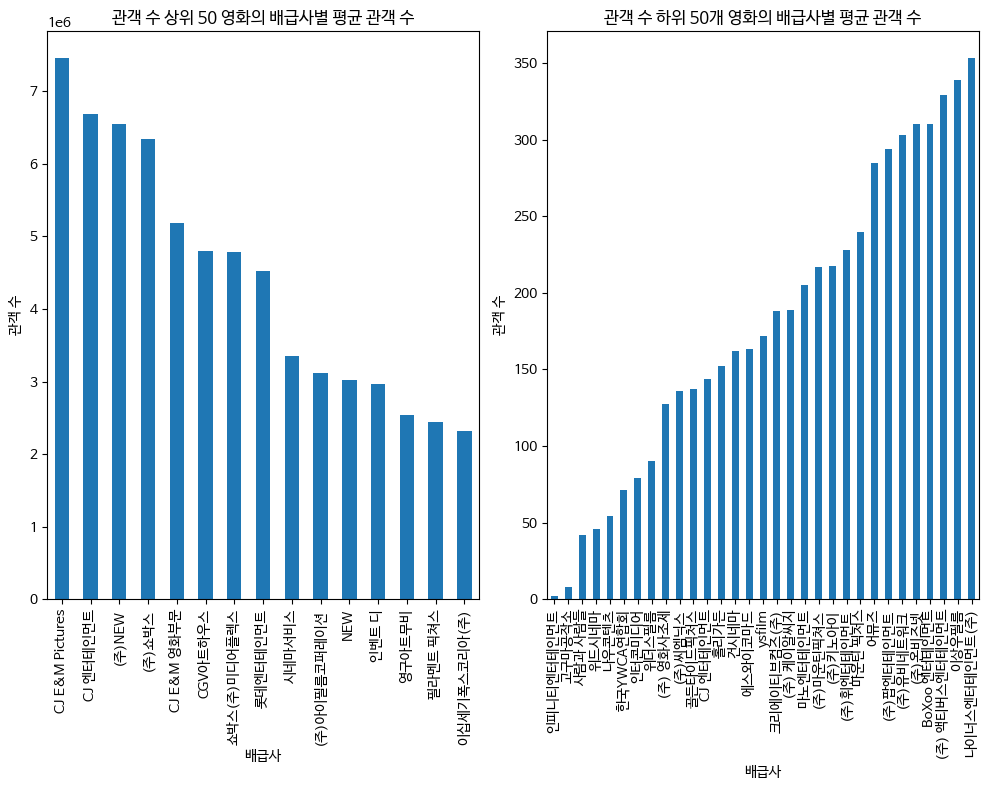

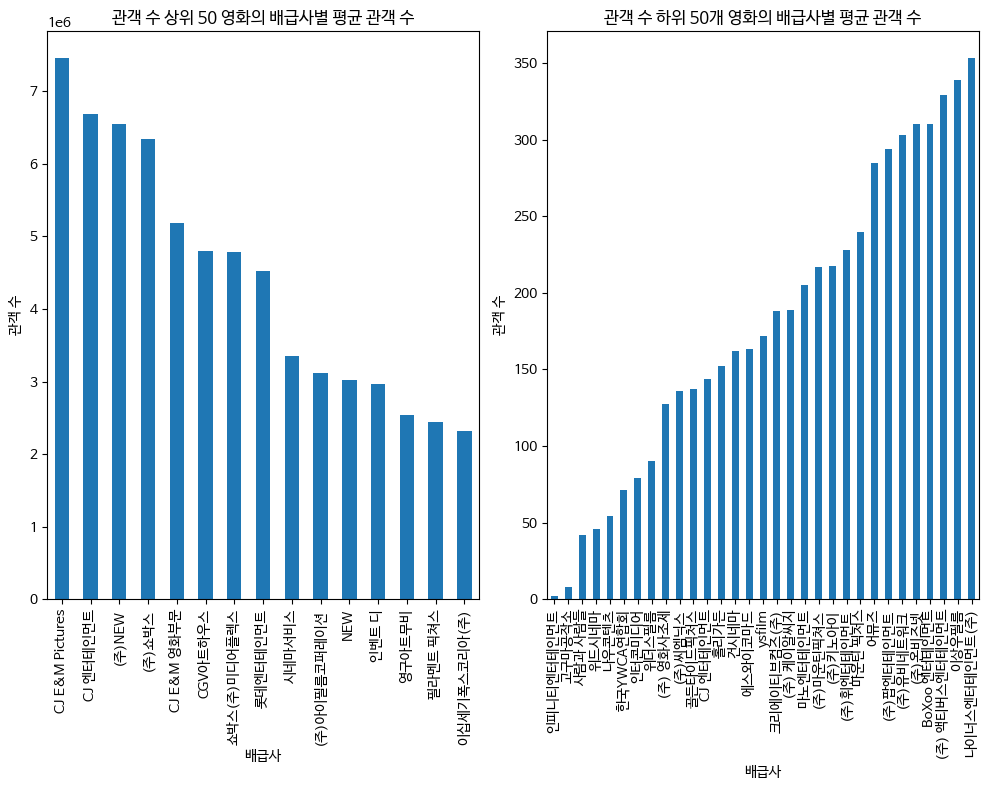

In [17]:
fig = plt.figure(figsize = [10,8])

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

data_top50 = top50.groupby('distributor')['box_off_num'].mean().sort_values(ascending=False)
data_top50.plot(kind='bar', y='box_off_num', ax = ax1)
ax1.set(title = '관객 수 상위 50 영화의 배급사별 평균 관객 수', xlabel = '배급사', ylabel = '관객 수')

data_bottom50 = bottom50.groupby('distributor')['box_off_num'].mean().sort_values()
data_bottom50.plot(kind='bar', y='box_off_num', ax = ax2)
ax2.set(title = '관객 수 하위 50개 영화의 배급사별 평균 관객 수', xlabel = '배급사', ylabel = '관객 수')

fig.tight_layout()
fig

In [18]:
print(len(top50['distributor'].unique()))
print(len(bottom50['distributor'].unique()))

15
31


관객 수 상위 50개 영화의 배급사의 unique값의 수는 총 15개.
반면 하위 50개 영화의 배급사는 unique 값이 31개이다.
이를 통해 상위 50개의 영화를 제작하는 배급사, 즉 영화 산업에서 흥행을 한 배급사는 하위의 배급사에 비해 시장 점유율이 높고 상위 영화를 독점하는 경향을 알 수 있다.
일반적으로 흥행한 배급사라면 이를 통해 회수한 금액으로 더 많은 영화에 투자하리라고 예측할 수 있다.

## 2) 배급사별 평균 스태프 수
> 상위 50개 영화의 배급사와 하위 50개 영화사의 평균 스태프 차이는 어떠할 것인지를 알아볼 것이다.



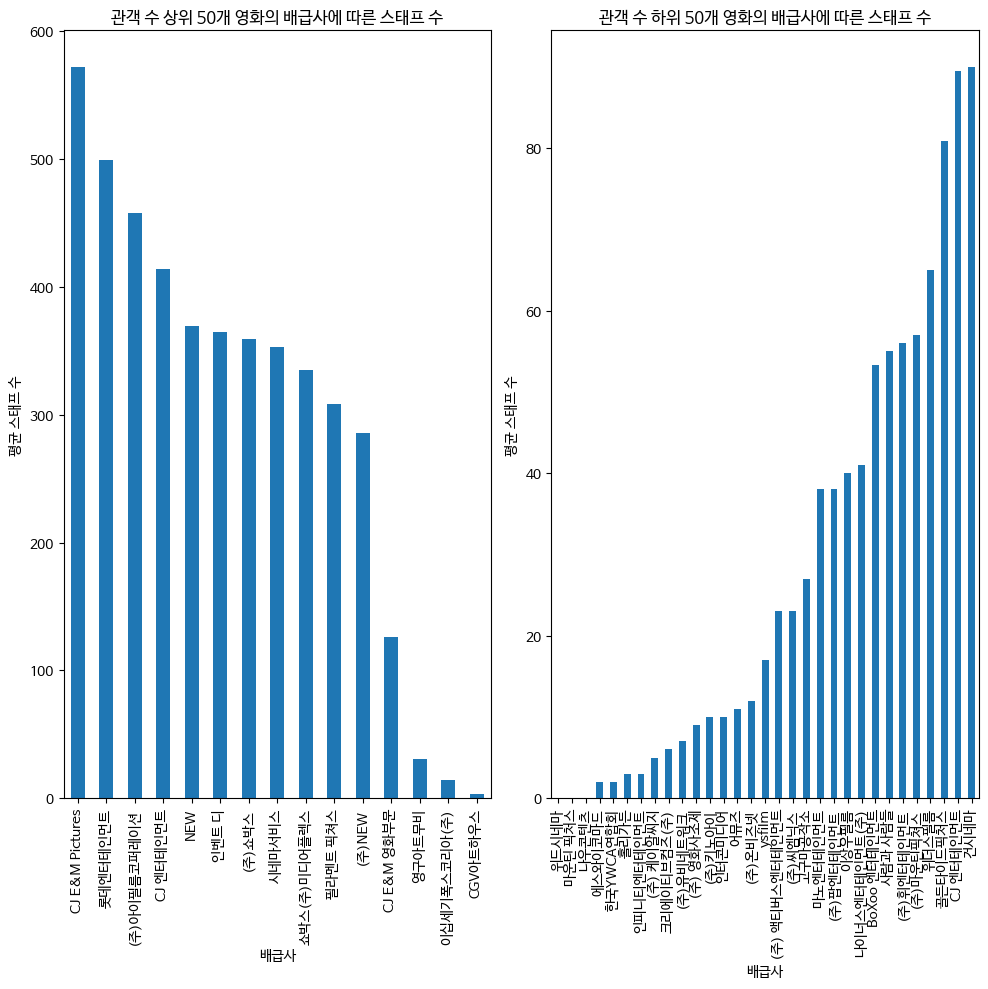

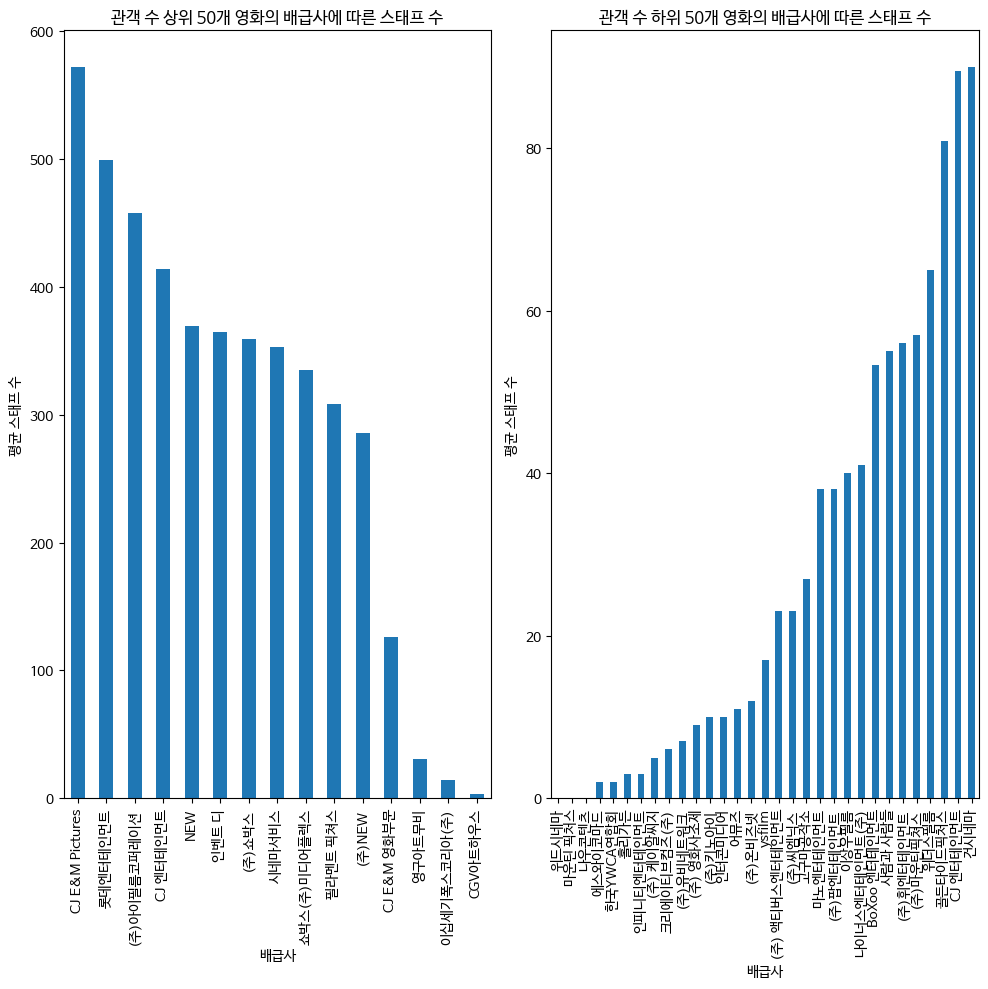

In [19]:
fig = plt.figure(figsize = [10,10])

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

data_top50 = top50.groupby('distributor')['num_staff'].mean().sort_values(ascending=False)
data_top50.plot(kind='bar', y='box_off_num', ax = ax1)
ax1.set(title = '관객 수 상위 50개 영화의 배급사에 따른 스태프 수', xlabel = '배급사', ylabel = '평균 스태프 수')

data_bottom50 = bottom50.groupby('distributor')['num_staff'].mean().sort_values()
data_bottom50.plot(kind='bar', y='box_off_num', ax = ax2)
ax2.set(title = '관객 수 하위 50개 영화의 배급사에 따른 스태프 수', xlabel = '배급사', ylabel = '평균 스태프 수')

fig.tight_layout()
fig

In [20]:
print(top50['num_staff'].mean())
print(bottom50['num_staff'].mean())

365.14
38.5


상위 50개 배급사의 평균 스태프 수는 365.14명, 하위 50개 배급사의 평균 스태프 수는 38.5명이다.

이를 통해 상위 50개 배급사는 하위 50개 배급사보다 더 많은 스태프를 채용하는 경향이 있음을 알 수 있고, 하위 50개 배급사는 보다 적은 수의 스태프를 채용하는 경향이 있음을 알 수 있다.

## 3) 배급사별 감독의 전작 수

> 상위 50개 영화의 배급사와 하위 50개 영화사의 "감독 전작 수의 평균의 차이"는 어떠할 것인지를 알아볼 것이다.



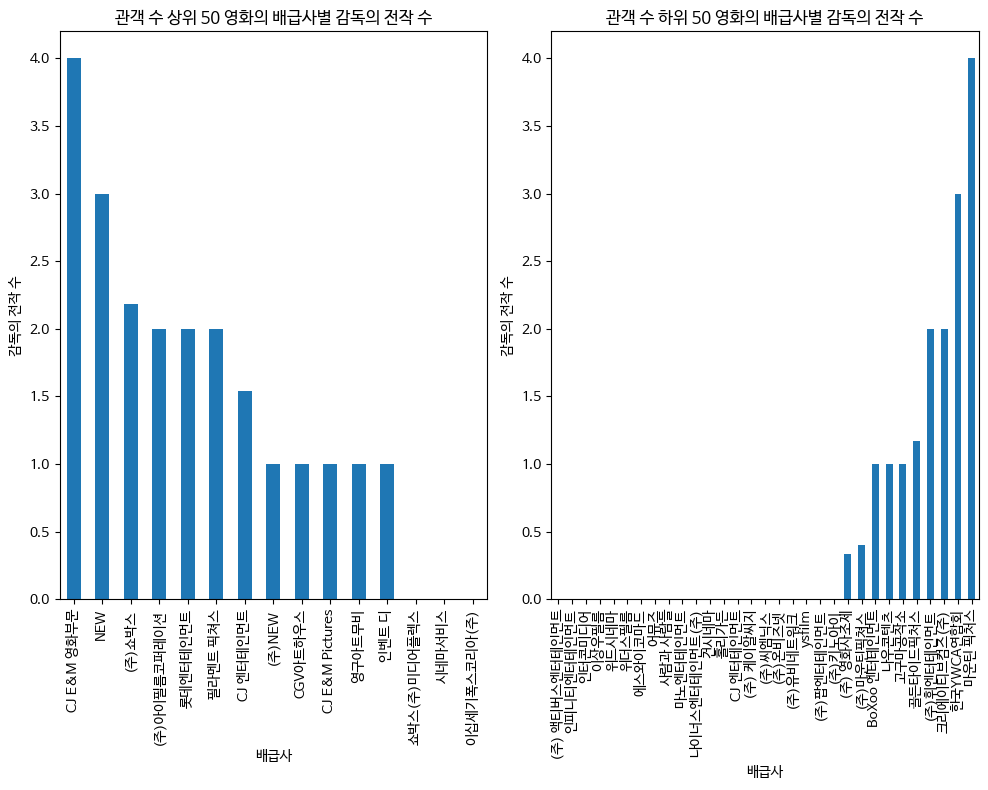

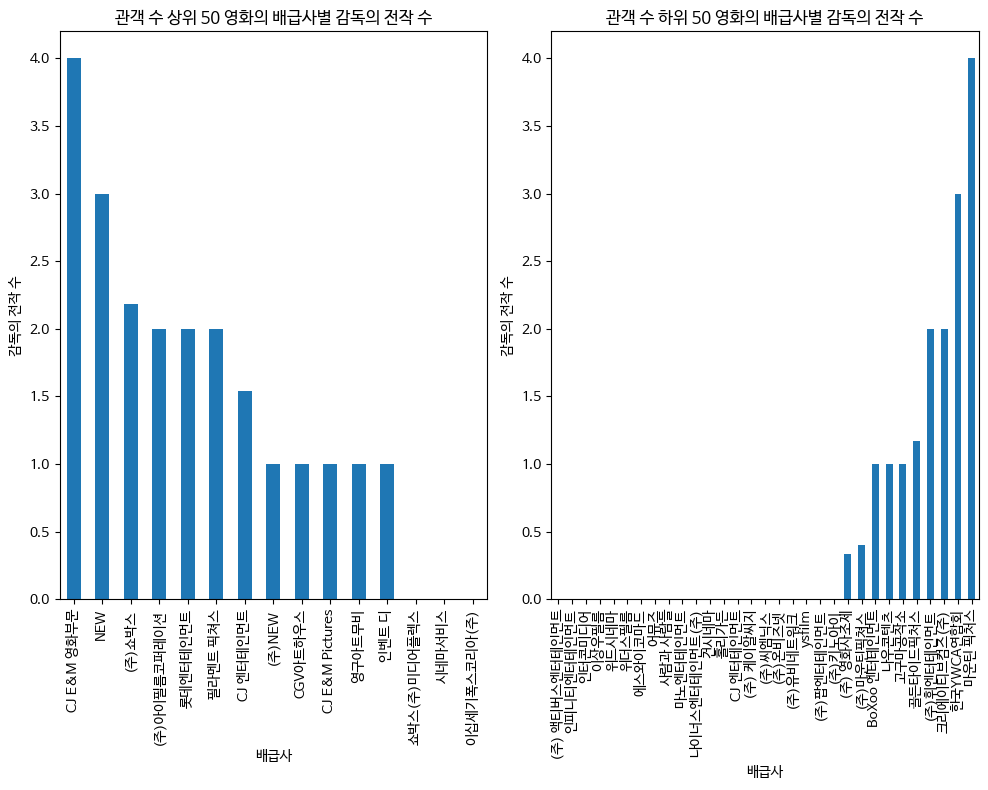

In [21]:
fig = plt.figure(figsize = [10,8])

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

data_top50 = top50.groupby('distributor')['dir_prev_num'].mean().sort_values(ascending=False)
data_top50.plot(kind='bar', y='dir_prev_num', ax = ax1)
ax1.set(title = '관객 수 상위 50 영화의 배급사별 감독의 전작 수', xlabel = '배급사', ylabel = '감독의 전작 수')

data_bottom50 = bottom50.groupby('distributor')['dir_prev_num'].mean().sort_values()
data_bottom50.plot(kind='bar', y='dir_prev_num', ax = ax2)
ax2.set(title = '관객 수 하위 50 영화의 배급사별 감독의 전작 수', xlabel = '배급사', ylabel = '감독의 전작 수')

fig.tight_layout()
fig

In [22]:
print(top50[top50['dir_prev_num']==0].count())
print(bottom50[bottom50['dir_prev_num']==0].count())

title             13
distributor       13
genre             13
release_time      13
time              13
screening_rat     13
director          13
dir_prev_bfnum     0
dir_prev_num      13
num_staff         13
num_actor         13
box_off_num       13
dtype: int64
title             38
distributor       38
genre             38
release_time      38
time              38
screening_rat     38
director          38
dir_prev_bfnum     0
dir_prev_num      38
num_staff         38
num_actor         38
box_off_num       38
dtype: int64


영화의 배급사 중에서 감독의 전 작품 개수가 0개인 영화는 상위 50개 배급사 중에선 13개이며, 하위 50개의 배급사 중에선 38개이다.

이를 통해 상위 50개 배급사는 하위 50개 배급사보다 경험이 많은 감독의 작품을 배급하는 경향이 있음을 알 수 있고, 하위 50개 배급사는 보다 모험적인 투자를 하는 경향이 있음을 알 수 있다.

## 4) 배급사별 감독의 전작 관객 수
> 상위 50개 영화의 배급사와 하위 50개 영화사의 "감독 전작 관객 수의 평균의 차이"는 어떠할 것인지를 알아볼 것이다.

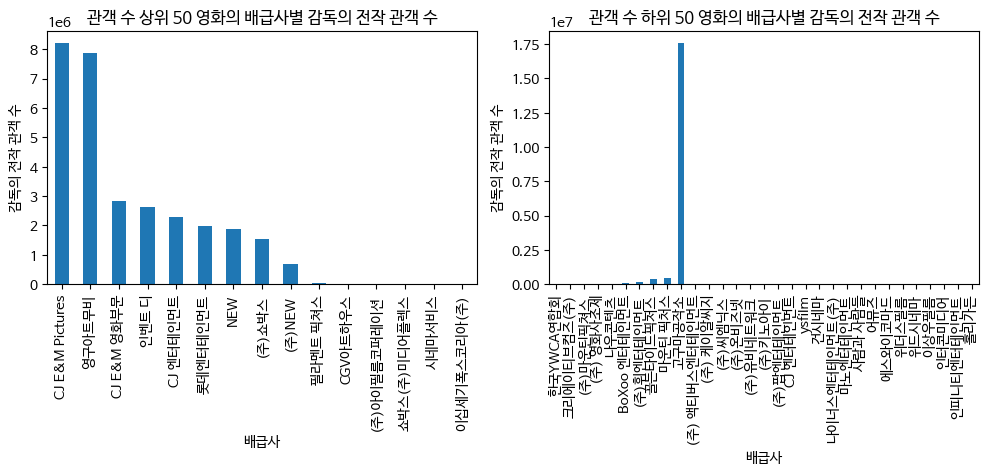

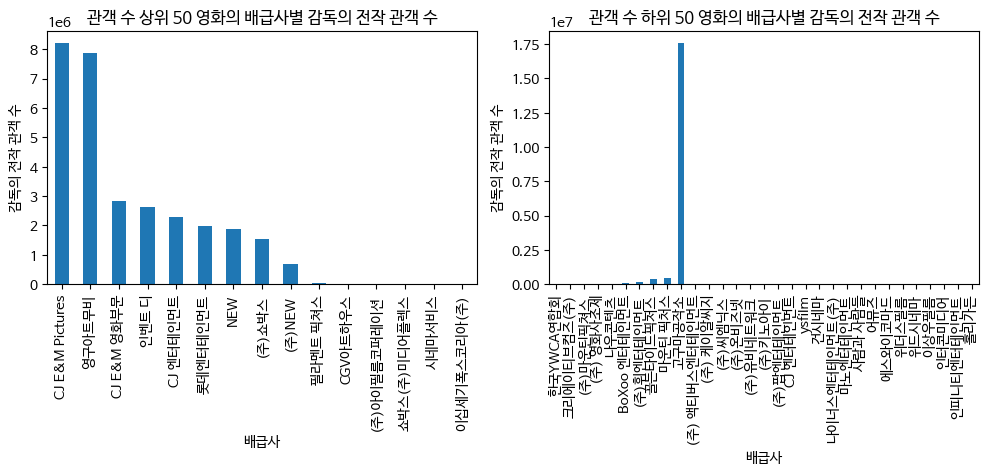

In [23]:
fig = plt.figure(figsize = [10,5])

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


data_top50 = top50.groupby('distributor')['dir_prev_bfnum'].mean().sort_values(ascending=False)
data_top50.plot(kind='bar', y='dir_prev_bfnum', ax = ax1)
ax1.set(title = '관객 수 상위 50 영화의 배급사별 감독의 전작 관객 수', xlabel = '배급사', ylabel = '감독의 전작 관객 수')

data_bottom50 = bottom50.groupby('distributor')['dir_prev_bfnum'].mean().sort_values()
data_bottom50.plot(kind='bar', y='dir_prev_bfnum', ax = ax2)
ax2.set(title = '관객 수 하위 50 영화의 배급사별 감독의 전작 관객 수', xlabel = '배급사', ylabel = '감독의 전작 관객 수')

fig.tight_layout()
fig

이를 통해 상위 50개 배급사는 하위 50개 배급사보다 전작 관객 수가 많은 감독에 투자하는 경향이 있음을 알 수 있다.또한 오히려 반대로 전작 관객 수가 많은 감독이 배급사과 관계 없이 다시 좋은 성과를 낸다는 상관관계가 있을 수도 있다.

# 5. 상영등급
## 1) 상영 등급에 따른 관객 수
상영 등급과 그에 따른 관객 수의 상관관계를 알아보고자 한다. 전체 train 데이터를 넣을 경우 boxplot의 모양을 파악하기 어렵다는 점에서 관객 수 상위 100개의 영화와 관객 수 하위 30개의 영화에 대해 분석했다.

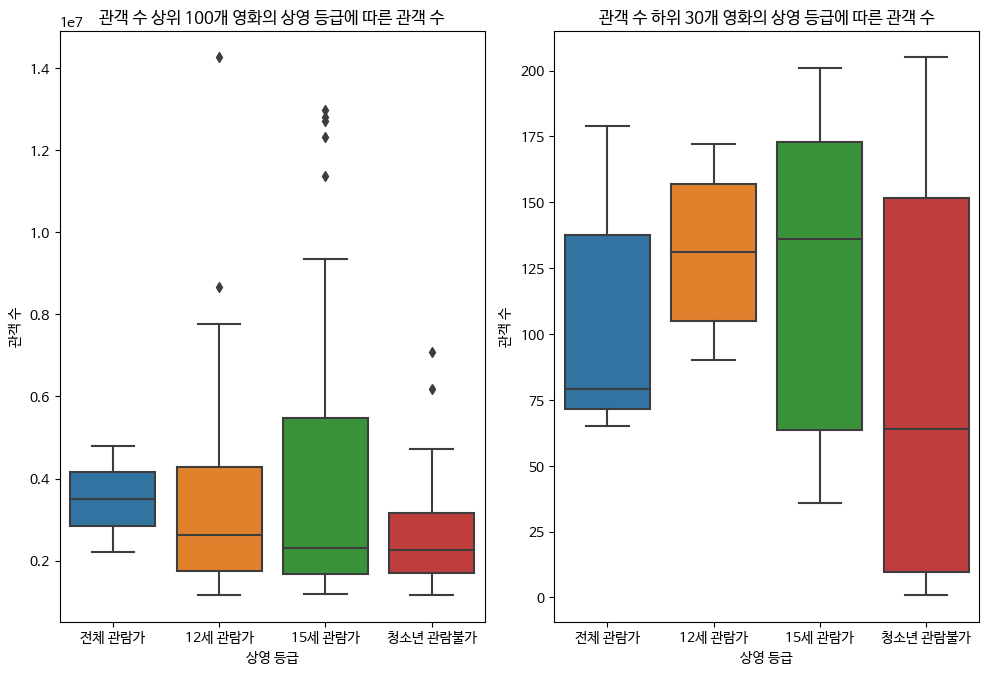

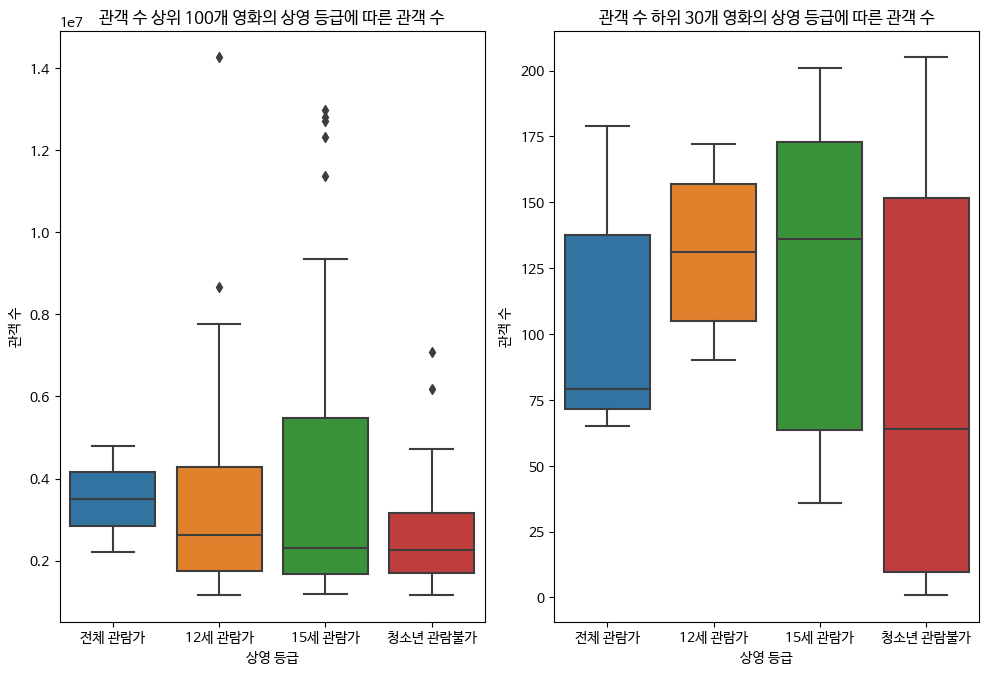

In [27]:
fig = plt.figure(figsize = [10,7])

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

order=["전체 관람가", "12세 관람가", "15세 관람가", "청소년 관람불가"]


sns.boxplot(x = 'screening_rat', y = 'box_off_num' , data = top100, order = order, ax = ax1)
ax1.set_title('관객 수 상위 100개 영화의 상영 등급에 따른 관객 수')
ax1.set_xlabel('상영 등급')
ax1.set_ylabel('관객 수')

sns.boxplot(x = 'screening_rat', y = 'box_off_num' , data = bottom30, order=order, ax = ax2)
ax2.set_title('관객 수 하위 30개 영화의 상영 등급에 따른 관객 수')
ax2.set_xlabel('상영 등급')
ax2.set_ylabel('관객 수')


fig.tight_layout()
fig



위의 결과를 통해 관객 수 상위 100개의 영화에서는 다음의 특징을 확인할 수 있었다.


*   '전체 관람가' 항목에서 가장 높은 중앙값을 관찰할 수 있었으며, IQR 범위가 가장 좁다는 것도 확인할 수 있었다. 이는 '전체 관람가' 항목의 영화는 다른 상영 등급의 영화들에 비해 안정적인 관객 수를 동원한다고 할 수 있다. 따라서 안정성을 추구한다면 전체 관람가 영화를 제작 또는 배급하는 것이 좋을 것이라고 해석할 수 있다.
*   '청소년 관람불가' 영화의 경우 가장 낮은 중앙값을 보이는 반면, 그 IQR 범위는 좁다. 이로부터 이 항목의 영화는 다른 항목의 영화에 비해서는 많은 관람객을 끌어들이지는 못하는 반면, IQR 범위가 좁다는 데에서 확실한 소비층을 확보하고 있다고 볼 수 있다.

관객 수 하위 30개의 영화에서는 다음의 특징을 확인할 수 있다.


*   상위 100개의 영화에서는 우세를 보이던 '전체 관람가' 항목이 오히려 인기를 끌지 못하고 있다고 볼 수 있다. 오히려 '12세 관람가' 항목의 영화가 가장 높은 중앙값과 좁은 IQR 범위를 갖고 있는 것을 확인할 수 있다.
*   '청소년 관람불가' 항목의 영화의 경우 중앙값이 가장 낮을 뿐더러 굉장히 넓은 IQR값을 가지는 것을 확인할 수 있다.


